In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays

using Statistics


In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(0,4,5000000)]
    pdf = ee_counter ./ length(spikes)
    return range(0,4,5000000), pdf
end

CALCPDF (generic function with 1 method)

In [4]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0
k1= 0.07; k2 = 0.07
k = 0.0
tspan = (0.0, 300000.0)

(0.0, 300000.0)

In [7]:
k_space = range(0.0, 1.0, step = 0.001)


spectrum_array = zeros(6, length(k_space))
condition_array = zeros(6, length(k_space))

EVA_array = zeros(length(k_space))

int(x) = floor(Int, x)
length(k_space)

1001

In [ ]:
for (i, k) in enumerate(k_space)
    
    if i == 1
        global u0 =  SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
    end
    
    println("Initial condition: $u0"); flush(stdout)
    println("k: $k"); flush(stdout)
    
    condition_array[:, i] = u0
    
    p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]
    
    prob = ODEProblem(HR, u0, tspan, p)
    sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)
   
    ds_HR = ContinuousDynamicalSystem(HR, u0, p )
    spectrum = lyapunovspectrum(ds_HR, tspan[2]; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))
    spectrum_array[1:6, i] = spectrum[1:6]
    println("Spectrum: ", spectrum_array[1:6, i]); flush(stdout)
    
    u0 = sol[end]
    
    println("Last point: ", u0); flush(stdout)
    
    xsum = sol[1,:] + sol[4,:]
    println("x_sum before truncate length: ", length(xsum)); flush(stdout)
    xsum = xsum[floor(Int, length(xsum) / 2):end ]
    println("x_sum after truncate length: ", length(xsum)); flush(stdout)
    
    Hs = Statistics.mean(xsum) + 6 * Statistics.std(xsum)
    counts = xsum[xsum.>=Hs]
    counts = length(counts)
    EVA_array[i]  = counts
    
    println("counts: ", counts)
    
    println(">>>>>>>>>>>>>>>")
    println("")
end

Initial condition: [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
k: 0.0


In [31]:
using NPZ
using JLD

NPZ.npzwrite("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy\\spectrum_HR_array.npy",spectrum_array)
NPZ.npzwrite("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy\\condition_HR_array.npy",condition_array)


save("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy\\spectrum_HR_array.jld", "data", spectrum_array)
save("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy\\condition_HR_array.jld", "data", condition_array)

In [35]:
NPZ.npzwrite("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy\\EVA_array.npy",EVA_array)

save("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy\\EVA_array.jld", "data", EVA_array)

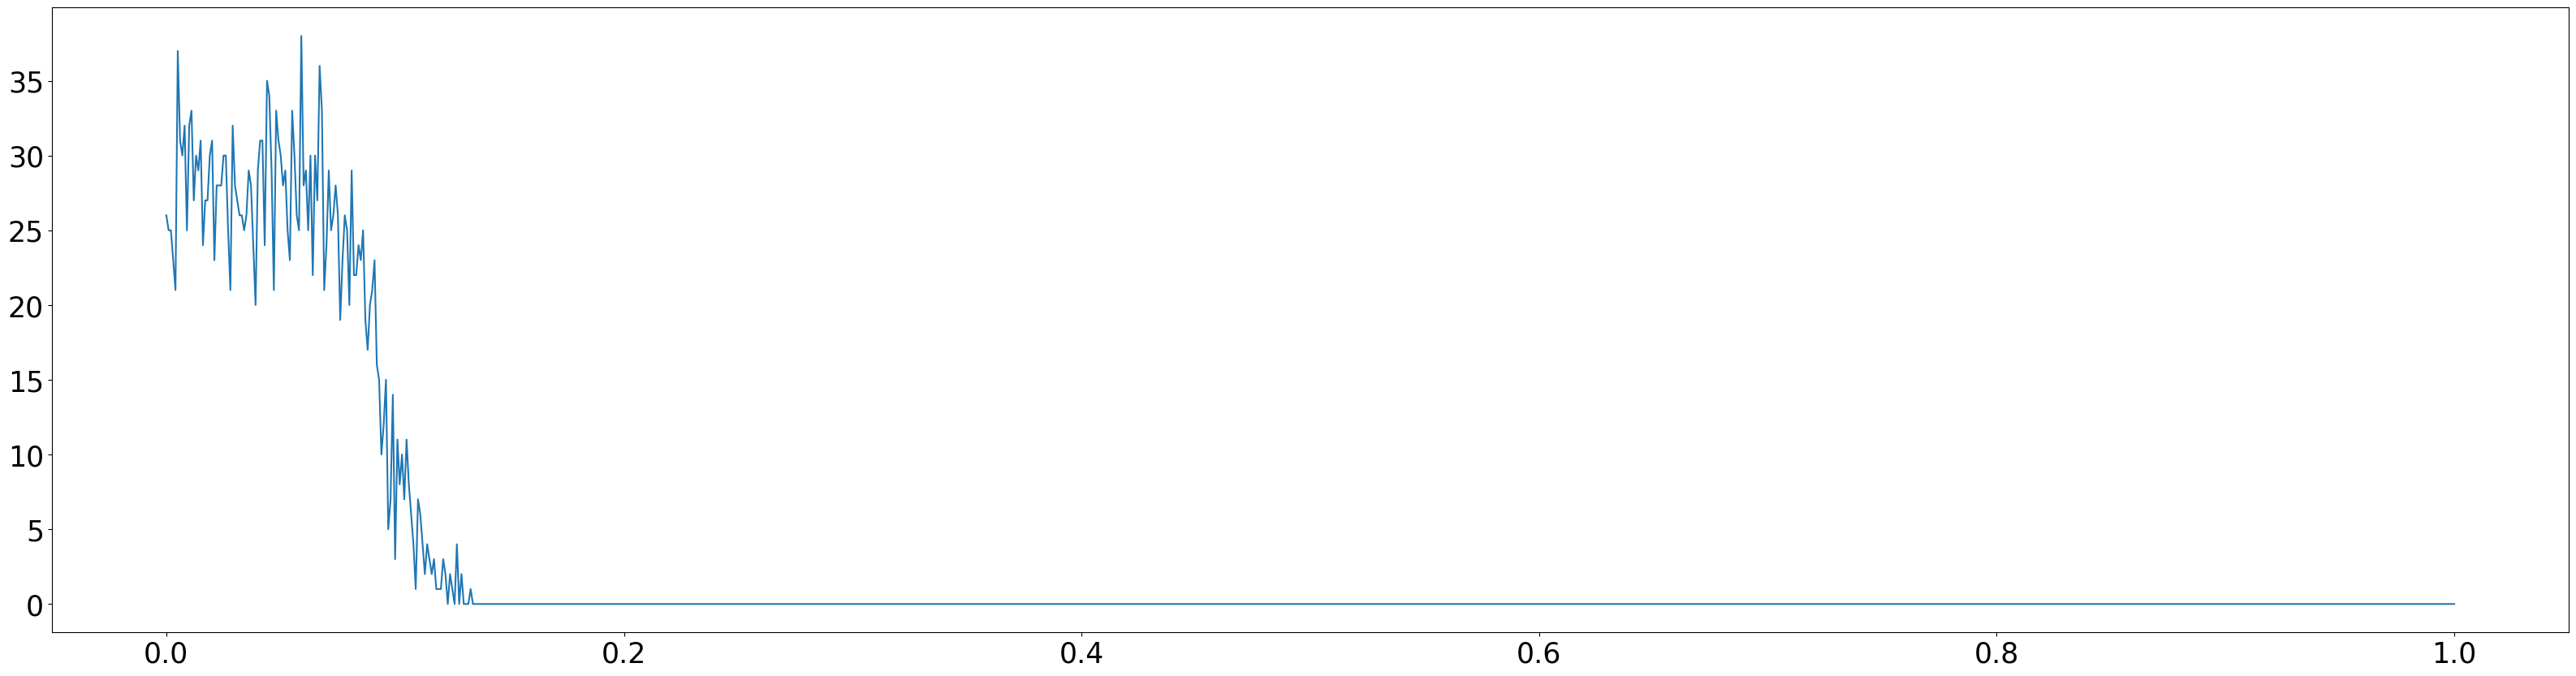

In [34]:
fig, ax = subplots(figsize = (40, 10))
st_pos, en_pos = 1, 201

ax.plot(k_space, EVA_array)


ax.tick_params(labelsize = 25)

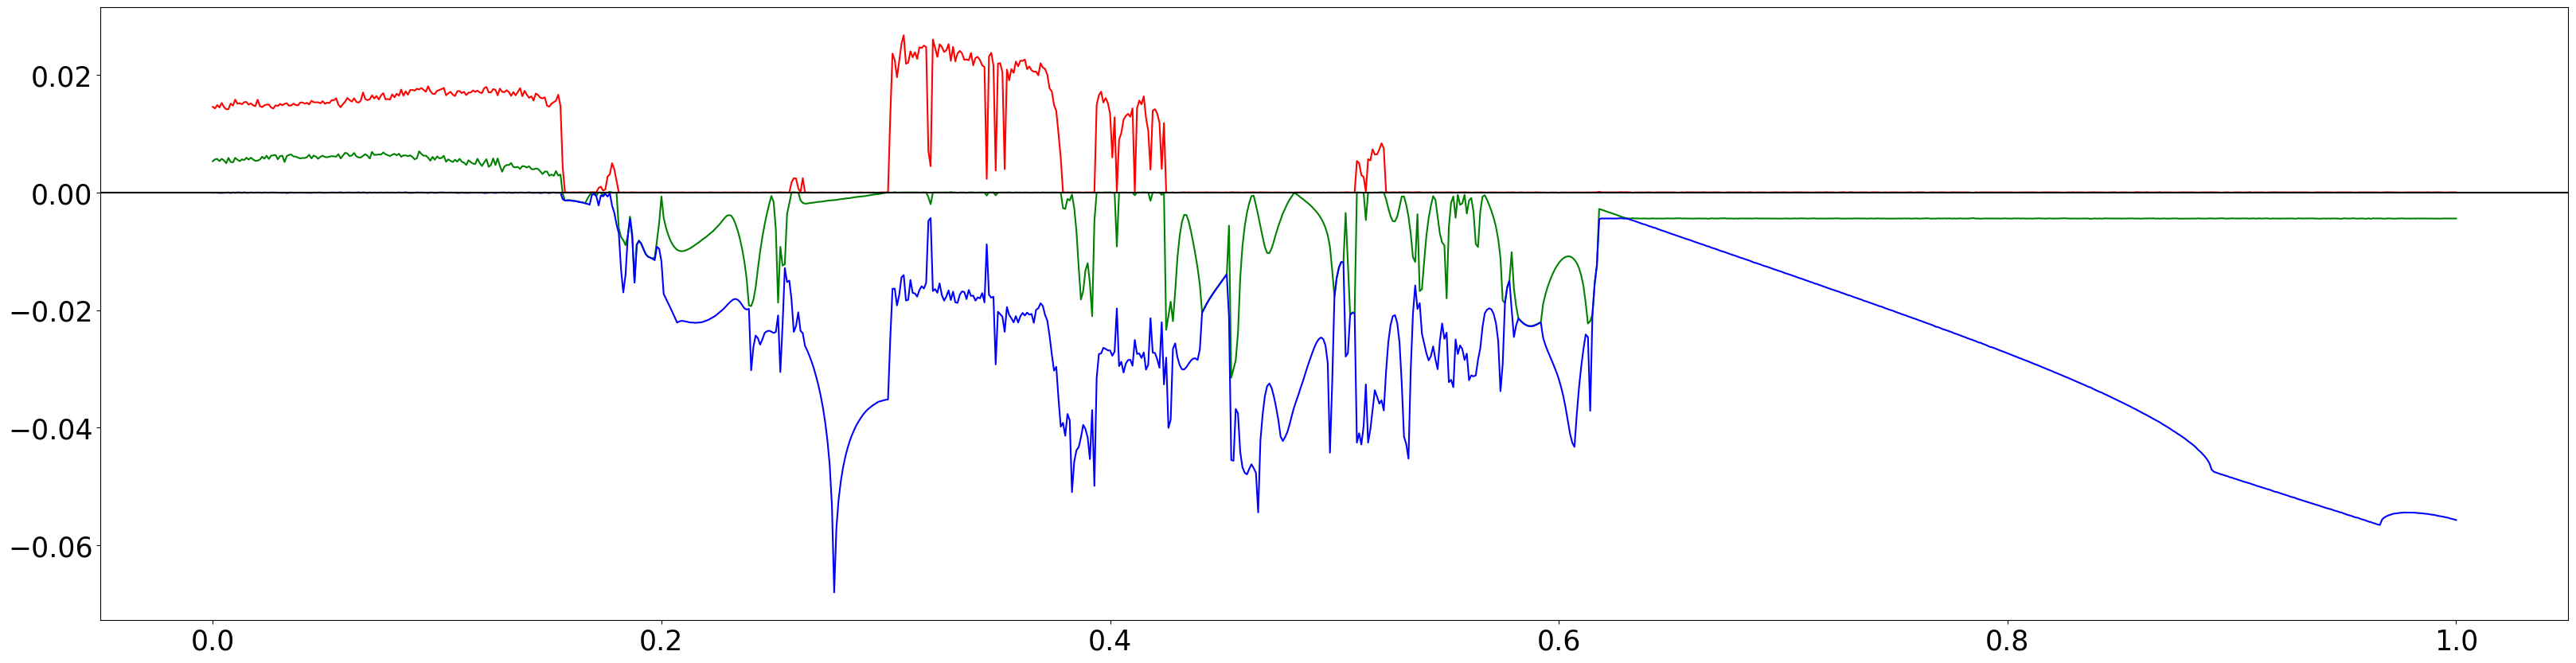

In [32]:
fig, ax = subplots(figsize = (40, 10))
ax.plot(k_space, spectrum_array[1, 1:end], color = "red")
ax.plot(k_space, spectrum_array[2, 1:end], color = "green")
ax.plot(k_space, spectrum_array[3, 1:end], color = "blue")
ax.axhline(0, color = "black")
ax.tick_params(labelsize = 25)

## old result

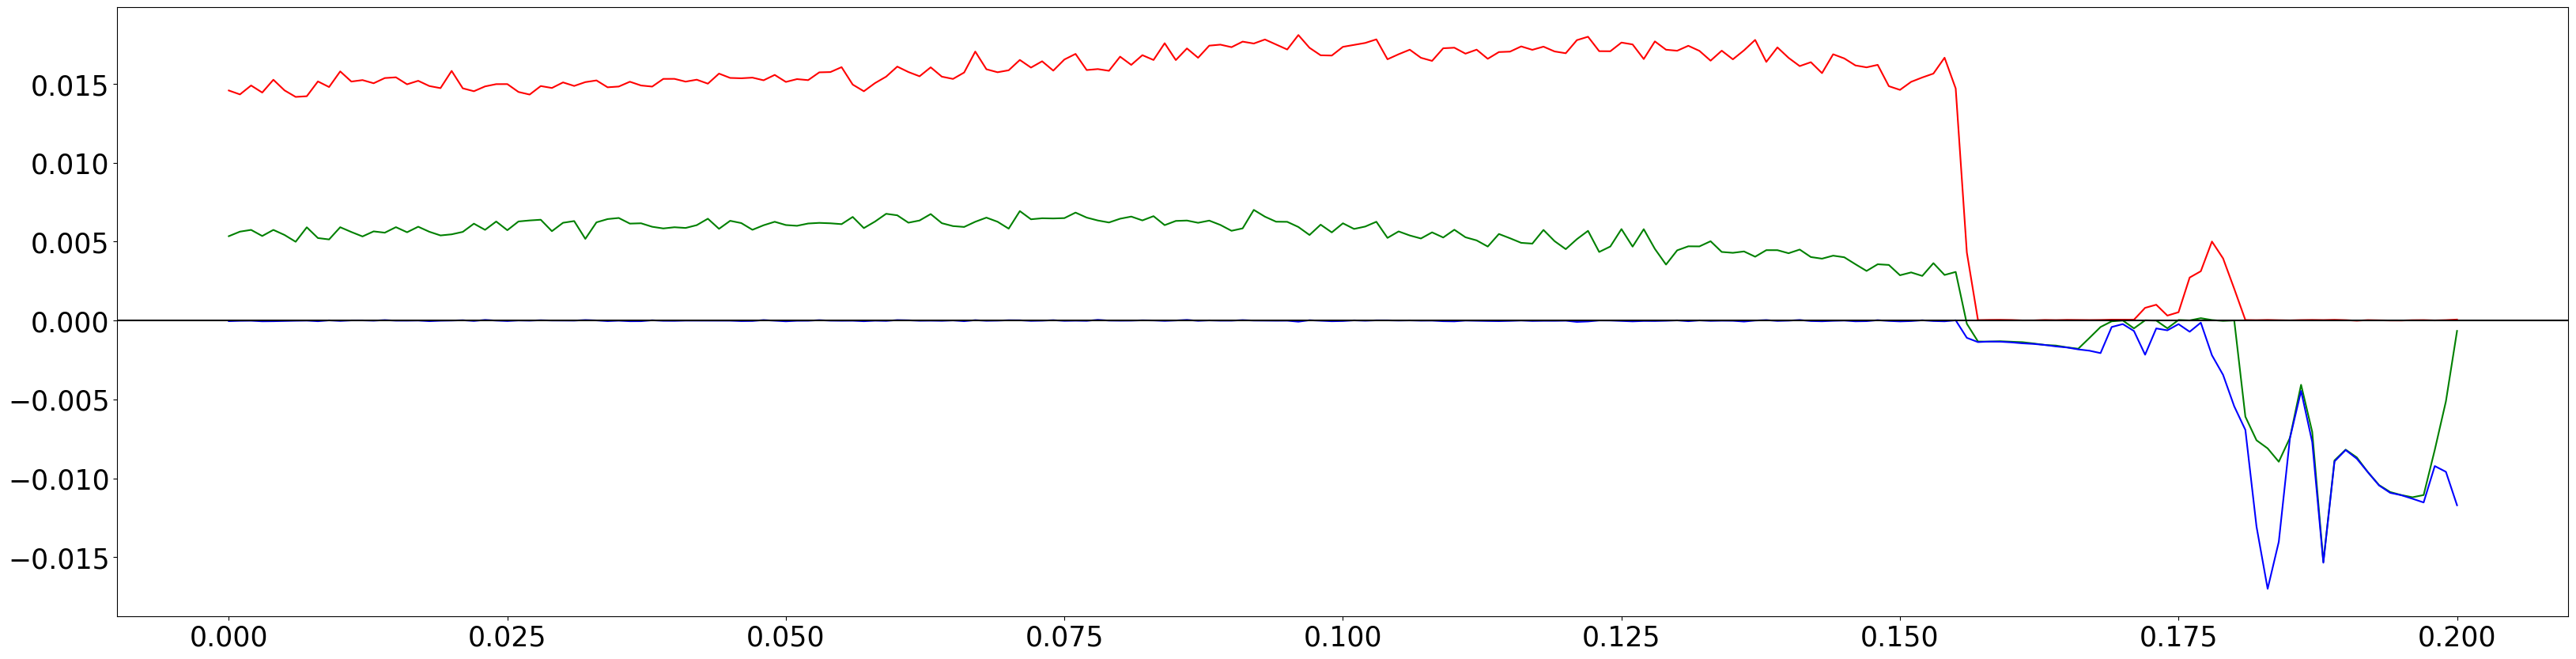

In [81]:
fig, ax = subplots(figsize = (40, 10))
st_pos, en_pos = 1, 201

ax.plot(k_space[st_pos:en_pos], spectrum_array[1, st_pos:en_pos], color = "red")
ax.plot(k_space[st_pos:en_pos], spectrum_array[2, st_pos:en_pos], color = "green")
ax.plot(k_space[st_pos:en_pos], spectrum_array[3, st_pos:en_pos], color = "blue")

ax.axhline(0, color = "black")
ax.tick_params(labelsize = 25)

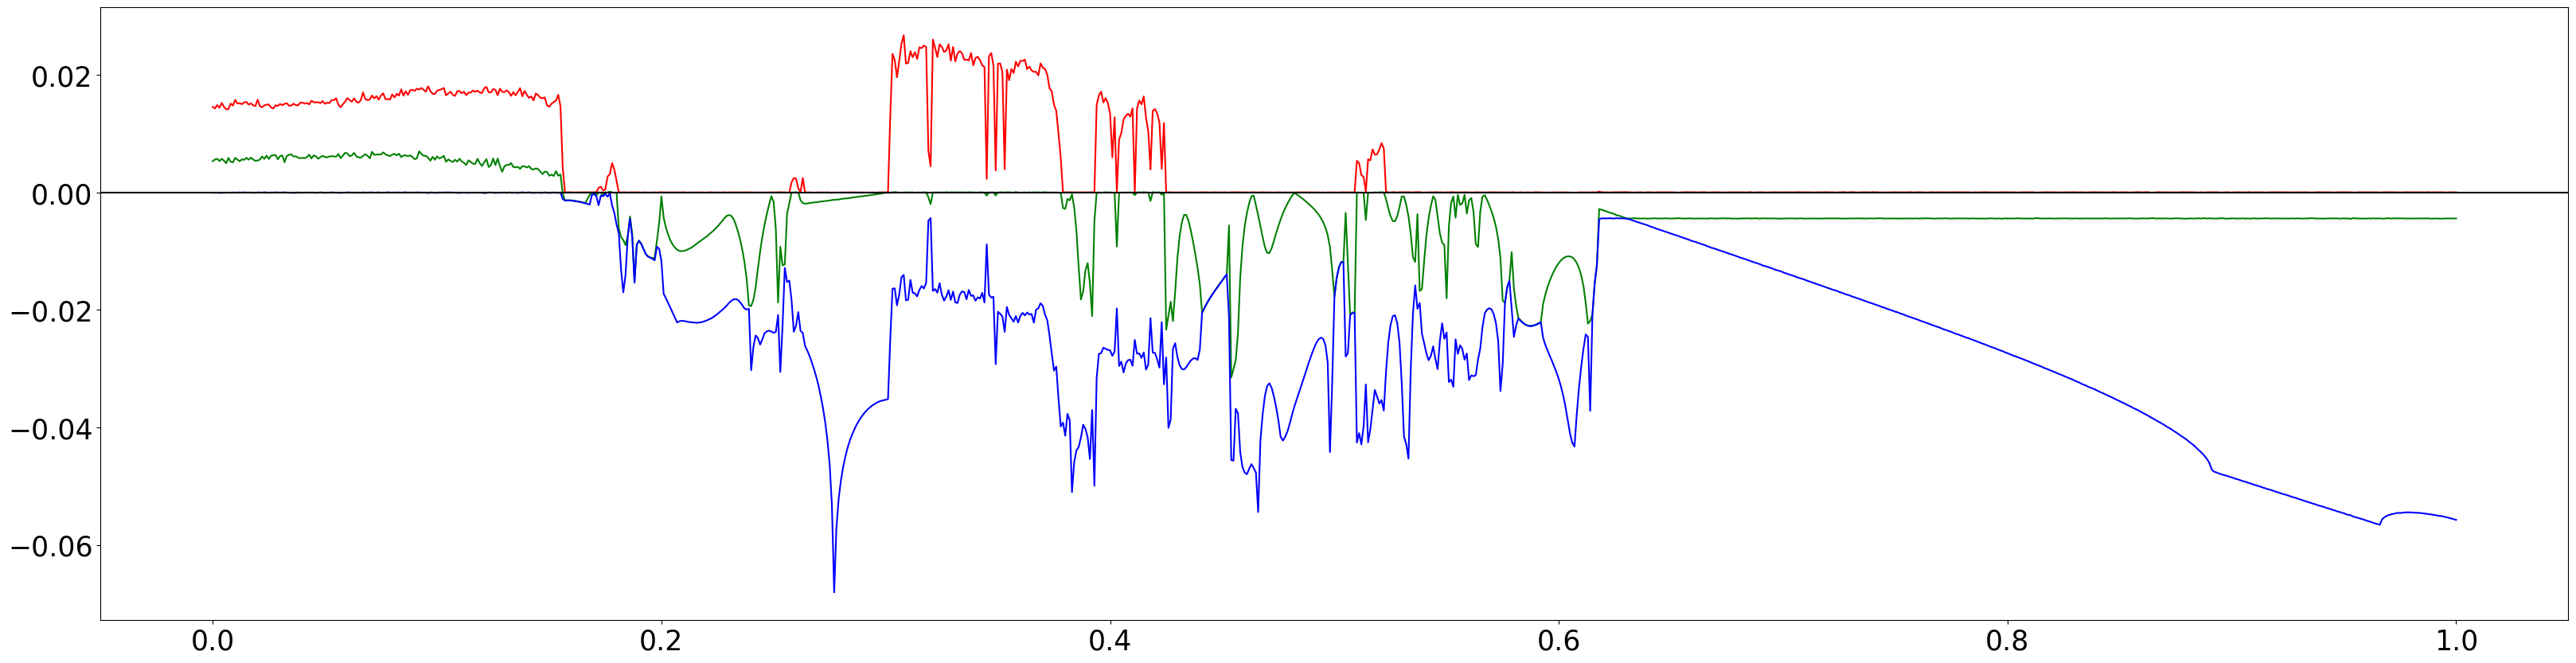

In [45]:
fig, ax = subplots(figsize = (40, 10))
ax.plot(k_space, spectrum_array[1, 1:end], color = "red")
ax.plot(k_space, spectrum_array[2, 1:end], color = "green")
ax.plot(k_space, spectrum_array[3, 1:end], color = "blue")
ax.axhline(0, color = "black")
ax.tick_params(labelsize = 25)

In [43]:
using NPZ
using JLD

NPZ.npzwrite("C:\\Users\\olenin.s\\Desktop\\HR_small_saved\\spectrum_HR_array.npy",spectrum_array)
NPZ.npzwrite("C:\\Users\\olenin.s\\Desktop\\HR_small_saved\\condition_HR_array.npy",condition_array)


save("C:\\Users\\olenin.s\\Desktop\\HR_small_saved\\spectrum_HR_array.jld", "data", spectrum_array)
save("C:\\Users\\olenin.s\\Desktop\\HR_small_saved\\condition_HR_array.jld", "data", condition_array)

In [169]:
filename = "$(lpad(1, 4, "0")).png"
directory = "C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\"
directory = directory * filename

"C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\0001.png"

In [16]:
cd("C:\\Users\\olenin.s\\Desktop\\before02\\timeseries")

In [11]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\k1k2_0.07"

In [8]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\k1k2_0.07"

In [7]:
cd("C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\k1k2_0.07")

In [5]:
cd("C:\\Users\\HOME\\Desktop\\ds\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_copy")

In [19]:
for i in range(1, 1001)
    mv("$i.png", "$(lpad(i, 5, "0")).png")
end

In [7]:
using FFMPEG

In [9]:
imagesdirectory = pwd()

"C:\\Users\\olenin.s\\Desktop\\02"

In [24]:
framerate = 3
gifname = "\\output.gif"
gifname = imagesdirectory * gifname

"C:\\Users\\olenin.s\\Desktop\\02\\output.gif"

In [3]:
cd("C:\\Users\\olenin.s\\Desktop\\02")

In [ ]:
FFMPEG.ffmpeg_exe(`-framerate $(framerate) -f image2 -i $(imagesdirectory)/%5d.png -y $(gifname)`)

In [25]:
FFMPEG.ffmpeg_exe(`-framerate $(framerate) -f image2 -i $(imagesdirectory)/%5d.png -vf "scale=1200:900" -c:v libx264 -pix_fmt yuv420p -y "C:\\Users\\olenin.s\\Desktop\\02\\output-video.mov"`)

ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8.1.0 (GCC)
  configuration: --enable-cross-compile --cross-prefix=/opt/x86_64-w64-mingw32/bin/x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw64 --cc=cc --cxx=c++ --dep-cc=cc --ar=ar --nm=nm --sysinclude=/workspace/destdir/include --pkg-config=/usr/bin/pkg-config --pkg-config-flags=--static --prefix=/workspace/destdir --sysroot=/opt/x86_64-w64-mingw32/x86_64-w64-mingw32/sys-root --extra-libs=-lpthread --enable-gpl --enable-version3 --enable-nonfree --disable-static --enable-shared --enable-pic --disable-debug --disable-doc --enable-avresample --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libvorbis --enable-libx264 --enable-libx265 --enable-libvpx --enable-encoders --enable-decoders --enable-muxers --enable-demuxers --enable-parsers --enable-openssl --disable-schannel --extra-cflags=-I/workspace/destdir/include --extra-ldflags=-L/workspace/destdi

Process(`'C:\Users\olenin.s\.julia\artifacts\ecb81e6429c089c1da802644fae337754832d534\bin\ffmpeg.exe' -framerate 3 -f image2 -i 'C:\Users\olenin.s\Desktop\02/%5d.png' -vf scale=1200:900 -c:v libx264 -pix_fmt yuv420p -y 'C:\Users\olenin.s\Desktop\02\output-video.mov'`, ProcessExited(0))

In [229]:
filename = "$(lpad(i, 5, "0")).png"
directory = "C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\"
directory = directory * filename

fig.savefig(directory)

In [8]:
"C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\" * "$(lpad(1, 4, "0")).png"

"C:\\Users\\olenin.s\\Desktop\\res_HR_full_small\\0001.png"